In [1]:
# import required tools
import csv
import nltk
import os, sys

# import textmine library
import docsouth_utils

neh_slave_archive = docsouth_utils.load_narratives()

In [2]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer

In [3]:
#neh_slave_archive_files = [x['file'] for x in neh_slave_archive]

In [4]:
#
# create input list of documents for the vectorizer
# and perform additional preprocessing (stopword removal, 
#  lowercase, dropping non-alpha characters, etc.)
#

neh_slave_archive_texts=list()
for i in neh_slave_archive:
    preprocessed=docsouth_utils.preprocess(i['text'])
    neh_slave_archive_texts.append(' '.join(preprocessed))

In [5]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(strip_accents='unicode',stop_words='english',lowercase=True)

trans_matrix = vectorizer.fit_transform(neh_slave_archive_texts)
trans_matrix = trans_matrix.toarray()

In [6]:
# calculate euclidean distance between each text
from sklearn.metrics.pairwise import euclidean_distances
euclidean_dist_matrix = euclidean_distances(trans_matrix)

In [7]:
# calculate cosine similarity distances between each text
from sklearn.metrics.pairwise import cosine_similarity
cosine_dist_matrix = 1 - cosine_similarity(trans_matrix)

In [8]:
print(np.round(min(cosine_dist_matrix[12,1],2)))
#print(max(euclidean_dist_matrix[12,1]))
print(np.argmin(cosine_dist_matrix))
print(np.argmin(euclidean_dist_matrix))

1.0
73750
0


In [9]:
neh_slave_archive[199]['title']
#dist_matrix[199]
#neh_slave_archive_texts[199]

'Narrative of the Life of Frederick Douglass, an American Slave. Written by Himself'

In [10]:
# distance between douglass and the other texts 
douglass_1845_narrative=199
dougdiff_dict={}
i=0
for text in neh_slave_archive: 
    dougdiff_dict[i] = np.round(cosine_dist_matrix[199,i],3)
    i=i+1

# display sorted distances from douglass
for x in sorted(dougdiff_dict, key=dougdiff_dict.__getitem__):
    print(neh_slave_archive[x]['file'],dougdiff_dict[x])

na-slave-narratives/data/texts/neh-douglass-douglass.txt -0.0
na-slave-narratives/data/texts/neh-douglass55-douglass55.txt 0.102
na-slave-narratives/data/texts/neh-edwardsj-edwardsj.txt 0.155
na-slave-narratives/data/texts/neh-douglasslife-douglass.txt 0.175
na-slave-narratives/data/texts/neh-clarke-clarke.txt 0.203
na-slave-narratives/data/texts/neh-dougl92-dougl92.txt 0.209
na-slave-narratives/data/texts/neh-clarkes-clarkes.txt 0.219
na-slave-narratives/data/texts/fpn-brownw-brown.txt 0.22
na-slave-narratives/data/texts/neh-hildreth-hildreth.txt 0.235
na-slave-narratives/data/texts/neh-penning49-penning49.txt 0.244
na-slave-narratives/data/texts/neh-watson-watson.txt 0.246
na-slave-narratives/data/texts/neh-brownbox-brownbox.txt 0.247
na-slave-narratives/data/texts/fpn-steward-steward.txt 0.253
na-slave-narratives/data/texts/neh-penning-penning.txt 0.254
na-slave-narratives/data/texts/neh-bibb-bibb.txt 0.254
na-slave-narratives/data/texts/neh-iwilliams-iwilliams.txt 0.255
na-slave-na

In [11]:
from sklearn.manifold import MDS
mds = MDS(n_components=2, dissimilarity="precomputed", random_state=1)
pos = mds.fit_transform(cosine_dist_matrix)

In [24]:
names = [os.path.basename(name['file']).replace('.txt', '') for name in neh_slave_archive]
names = [i.split("-")[2] for i in names]

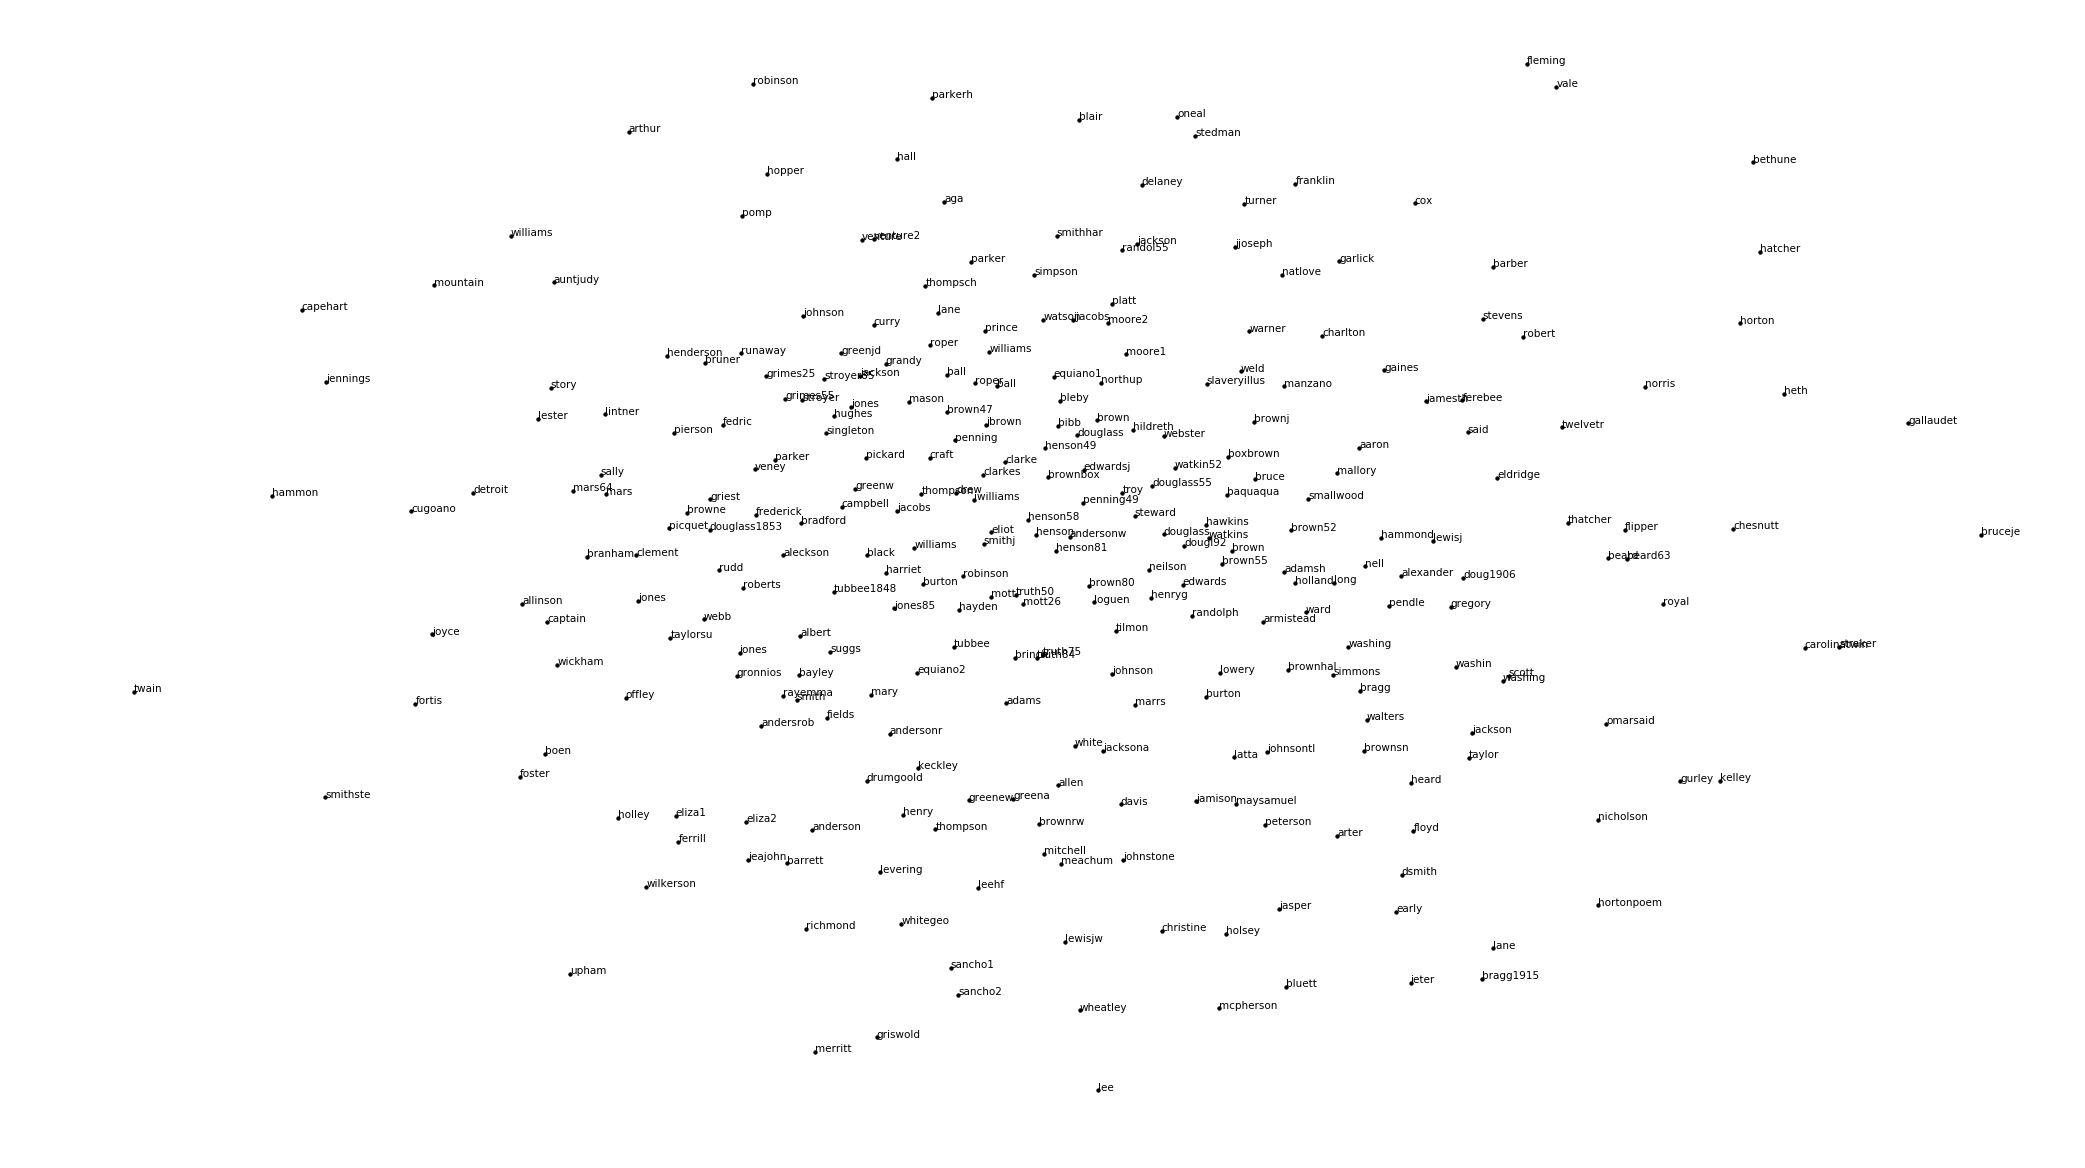

In [39]:
import os
import matplotlib.pyplot as plt
xs, ys = pos[:, 0], pos[:, 1]
fig = plt.figure(figsize=(35, 20), dpi=75)
for x, y, name in zip(xs, ys, names):
    plt.scatter(x, y, c='black',s=10)
    plt.text(x, y, name)
plt.axis('off')
plt.show()